<a href="https://colab.research.google.com/github/KhyatiGupta8/Student-Grade-Prediction/blob/main/StudentGradePrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Loading Data

In [70]:
from google.colab import files 
uploaded = files.upload()

Saving Student_data.csv to Student_data (1).csv


##Importing modules

In [71]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

##Analyzing Data

In [72]:
stud_data=pd.read_csv(r'Student_data.csv')
stud_data.describe()

,raisedhands,VisITedResources,AnnouncementsView,Discussion
count,480.000000,480.000000,480.000000,480.000000
mean,46.775000,54.797917,37.918750,43.283333
std,30.779223,33.080007,26.611244,27.637735
min,0.000000,0.000000,0.000000,1.000000
25%,15.750000,20.000000,14.000000,20.000000
50%,50.000000,65.000000,33.000000,39.000000
75%,75.000000,84.000000,58.000000,70.000000
max,100.000000,99.000000,98.000000,99.000000


In [73]:
stud_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 480 entries, 0 to 479
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   gender                    480 non-null    object
 1   NationalITy               480 non-null    object
 2   PlaceofBirth              480 non-null    object
 3   StageID                   480 non-null    object
 4   GradeID                   480 non-null    object
 5   SectionID                 480 non-null    object
 6   Topic                     480 non-null    object
 7   Semester                  480 non-null    object
 8   Relation                  480 non-null    object
 9   raisedhands               480 non-null    int64 
 10  VisITedResources          480 non-null    int64 
 11  AnnouncementsView         480 non-null    int64 
 12  Discussion                480 non-null    int64 
 13  ParentAnsweringSurvey     480 non-null    object
 14  ParentschoolSatisfaction  

In [74]:
stud_data

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
0,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,15,16,2,20,Yes,Good,Under-7,M
1,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,20,20,3,25,Yes,Good,Under-7,M
2,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,10,7,0,30,No,Bad,Above-7,L
3,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,30,25,5,35,No,Bad,Above-7,L
4,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,40,50,12,50,No,Bad,Above-7,M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
475,F,Jordan,Jordan,MiddleSchool,G-08,A,Chemistry,S,Father,5,4,5,8,No,Bad,Above-7,L
476,F,Jordan,Jordan,MiddleSchool,G-08,A,Geology,F,Father,50,77,14,28,No,Bad,Under-7,M
477,F,Jordan,Jordan,MiddleSchool,G-08,A,Geology,S,Father,55,74,25,29,No,Bad,Under-7,M
478,F,Jordan,Jordan,MiddleSchool,G-08,A,History,F,Father,30,17,14,57,No,Bad,Above-7,L


In [75]:
stud_data.columns

Index(['gender', 'NationalITy', 'PlaceofBirth', 'StageID', 'GradeID',
       'SectionID', 'Topic', 'Semester', 'Relation', 'raisedhands',
       'VisITedResources', 'AnnouncementsView', 'Discussion',
       'ParentAnsweringSurvey', 'ParentschoolSatisfaction',
       'StudentAbsenceDays', 'Class'],
      dtype='object')

In [76]:
stud_data.shape

(480, 17)

In [77]:
stud_data.rename(index=str,columns={'gender':'Gender', 'NationalITy':'Nationality','raisedhands':'RaisedHands', 'VisITedResources':'VisitedResources'},inplace=True)

In [78]:
df=stud_data.drop(columns=['Relation','ParentAnsweringSurvey','AnnouncementsView'])

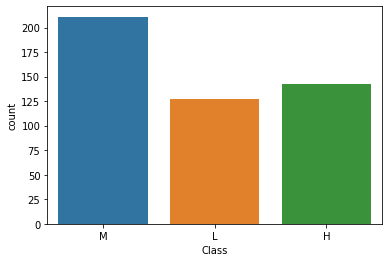

In [79]:
counts=sns.countplot(x='Class',data=df)

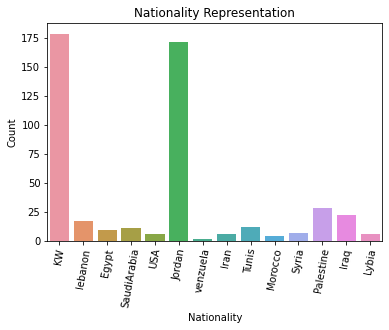

In [80]:
nation=sns.countplot(x='Nationality',data=df)
nation.set(xlabel='Nationality', ylabel='Count', title='Nationality Representation')
plt.setp(nation.get_xticklabels(), rotation=80)
plt.show()

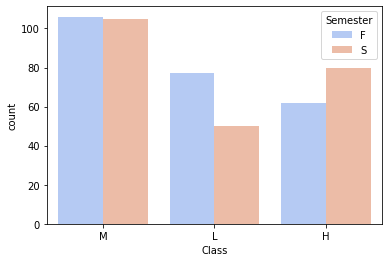

In [81]:
sem=sns.countplot(x='Class',data=df,hue='Semester',palette='coolwarm')

In [82]:
X = df.drop('Class', axis=1)
y = df['Class']

In [83]:
len(df.columns)

14

##Modelling on Data

In [84]:
# Encoding our categorical columns in X
labelEncoder = LabelEncoder()
cat_columns = X.dtypes.pipe(lambda x: x[x == 'object']).index
for col in cat_columns:
    X[col] = labelEncoder.fit_transform(X[col])
#print(df)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=52)

In [85]:
cat_columns

Index(['Gender', 'Nationality', 'PlaceofBirth', 'StageID', 'GradeID',
       'SectionID', 'Topic', 'Semester', 'ParentschoolSatisfaction',
       'StudentAbsenceDays'],
      dtype='object')

In [86]:
# Logistic Regression as baseline, then exploring tree-based methods
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

keys = []
scores = []
models = {'Logistic Regression': LogisticRegression(), 'Decision Tree': DecisionTreeClassifier(),
          'Random Forest': RandomForestClassifier(n_estimators=300, random_state=52),'SVM':SVC()}

for k,v in models.items():
    mod = v
    mod.fit(X_train, y_train)
    pred = mod.predict(X_test)
    print('Results for: ' + str(k) + '\n')
    print(confusion_matrix(y_test, pred))
    print(classification_report(y_test, pred))
    acc = accuracy_score(y_test, pred)
    print("accuracy is "+ str(acc))
    print('\n' + '\n')
    keys.append(k)
    scores.append(acc)
    table = pd.DataFrame({'model':keys, 'accuracy score':scores})

print(table)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Results for: Logistic Regression

[[31  0 21]
 [ 0 30  6]
 [ 8  5 43]]
              precision    recall  f1-score   support

           H       0.79      0.60      0.68        52
           L       0.86      0.83      0.85        36
           M       0.61      0.77      0.68        56

    accuracy                           0.72       144
   macro avg       0.76      0.73      0.74       144
weighted avg       0.74      0.72      0.72       144

accuracy is 0.7222222222222222



Results for: Decision Tree

[[28  0 24]
 [ 1 27  8]
 [18  5 33]]
              precision    recall  f1-score   support

           H       0.60      0.54      0.57        52
           L       0.84      0.75      0.79        36
           M       0.51      0.59      0.55        56

    accuracy                           0.61       144
   macro avg       0.65      0.63      0.64       144
weighted avg       0.62      0.61      0.61       144

accuracy is 0.6111111111111112



Results for: Random Forest

[[31  

Random forest is the best classifier, giving maximum accuracy.

In [87]:
from sklearn.metrics import classification_report, confusion_matrix

rfc=RandomForestClassifier(n_estimators=300, random_state=52)
rfc.fit(X_train,y_train)
yp=rfc.predict(X_test)

print("=== Confusion Matrix ===")
print(confusion_matrix(y_test, yp))
print('\n')
print("=== Classification Report ===")
print(classification_report(y_test, yp))
print('\n')
print("=== Accuracy Score ===")
print(accuracy_score(yp,y_test))

=== Confusion Matrix ===
[[31  0 21]
 [ 1 32  3]
 [ 3  4 49]]


=== Classification Report ===
              precision    recall  f1-score   support

           H       0.89      0.60      0.71        52
           L       0.89      0.89      0.89        36
           M       0.67      0.88      0.76        56

    accuracy                           0.78       144
   macro avg       0.82      0.79      0.79       144
weighted avg       0.80      0.78      0.78       144



=== Accuracy Score ===
0.7777777777777778


#Feature Selection

In [88]:
def select_features(X_train, y_train, X_test):
	# configure to select all features
	fs = SelectKBest(score_func=mutual_info_classif, k='all')
	# learn relationship from training data
	fs.fit(X_train, y_train)
	# transform train input data
	X_train_fs = fs.transform(X_train)
	# transform test input data
	X_test_fs = fs.transform(X_test)
	return X_train_fs, X_test_fs, fs

Feature 0: 0.023032
Feature 1: 0.029842
Feature 2: 0.032756
Feature 3: 0.027770
Feature 4: 0.015463
Feature 5: 0.001762
Feature 6: 0.045171
Feature 7: 0.000000
Feature 8: 0.269712
Feature 9: 0.325756
Feature 10: 0.045263
Feature 11: 0.118698
Feature 12: 0.234375


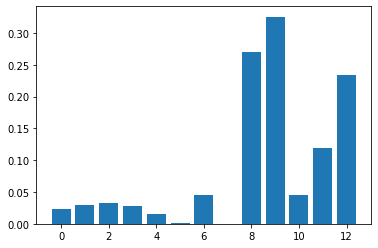

In [89]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_classif
from matplotlib import pyplot

X_train_fs, X_test_fs, fs = select_features(X_train, y_train, X_test)
for i in range(len(fs.scores_)):
	print('Feature %d: %f' % (i, fs.scores_[i]))
# plot the scores
pyplot.bar([i for i in range(len(fs.scores_))], fs.scores_)
pyplot.show()

In [90]:
model = LogisticRegression(solver='liblinear')
model.fit(X_train_fs, y_train)
# evaluate the model
yhat = model.predict(X_test_fs)
# evaluate predictions
accuracy = accuracy_score(y_test, yhat)
print('Accuracy: %.2f' % (accuracy*100))

Accuracy: 71.53


In [91]:
from pandas import read_csv
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from matplotlib import pyplot

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# define the pipeline to evaluate
model = LogisticRegression(solver='liblinear')
fs = SelectKBest(score_func=f_classif)
pipeline = Pipeline(steps=[('anova',fs), ('lr', model)])
# define the grid
grid = dict()
grid['anova__k'] = [i+1 for i in range(X.shape[1])]
# define the grid search
search = GridSearchCV(pipeline, grid, scoring='accuracy', n_jobs=-1, cv=cv)
# perform the search
results = search.fit(X, y)
# summarize best
print('Best Mean Accuracy: %.3f' % results.best_score_)
print('Best Config: %s' % results.best_params_)

Best Mean Accuracy: 0.713
Best Config: {'anova__k': 5}


##Custom Input


In [92]:
#data = np.array(data, dtype=np.float32)
#y = list(map(int, y))

import numpy as np
test2={'Gender':'M', 'Nationality':'KW', 'PlaceofBirth':'KuwaIT', 'StageID':'lowerlevel', 'GradeID':'G-02',
       'SectionID':'A', 'Topic':'IT', 'Semester':'F', 'RaisedHands':[8], 'VisitedResources':[25],
       'Discussion':[70], 'ParentschoolSatisfaction':'Bad', 'StudentAbsenceDays':'Above-7',
       'Class':'L'}
p=pd.DataFrame.from_dict(test2)
test2=p.drop('Class',axis=1)
y1=p['Class']

In [93]:
# Encoding our categorical columns in X
labelEncoder = LabelEncoder()
cat_columns = test2.dtypes.pipe(lambda x: x[x == 'object']).index
for col in cat_columns:
    test2[col] = labelEncoder.fit_transform(test2[col])
#print(df)
#x1_train, x1_test, y1_train, y1_test = train_test_split(x1, y1, test_size=0.3, random_state=52)
from sklearn.metrics import classification_report, confusion_matrix

In [94]:
rfc=RandomForestClassifier(n_estimators=300, random_state=52)
rfc.fit(X_train,y_train)
yp1=rfc.predict(test2)
yp1

array(['L'], dtype=object)

In [95]:
p['Class']=yp1
p

,Gender,Nationality,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,RaisedHands,VisitedResources,Discussion,ParentschoolSatisfaction,StudentAbsenceDays,Class
0,M,KW,KuwaIT,lowerlevel,G-02,A,IT,F,8,25,70,Bad,Above-7,L


In [96]:
datafrm = pd.concat([df,p], ignore_index=True)
datafrm

,Gender,Nationality,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,RaisedHands,VisitedResources,Discussion,ParentschoolSatisfaction,StudentAbsenceDays,Class
0,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,15,16,20,Good,Under-7,M
1,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,20,20,25,Good,Under-7,M
2,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,10,7,30,Bad,Above-7,L
3,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,30,25,35,Bad,Above-7,L
4,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,40,50,50,Bad,Above-7,M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
476,F,Jordan,Jordan,MiddleSchool,G-08,A,Geology,F,50,77,28,Bad,Under-7,M
477,F,Jordan,Jordan,MiddleSchool,G-08,A,Geology,S,55,74,29,Bad,Under-7,M
478,F,Jordan,Jordan,MiddleSchool,G-08,A,History,F,30,17,57,Bad,Above-7,L
479,F,Jordan,Jordan,MiddleSchool,G-08,A,History,S,35,14,62,Bad,Above-7,L


In [97]:
df.columns

Index(['Gender', 'Nationality', 'PlaceofBirth', 'StageID', 'GradeID',
       'SectionID', 'Topic', 'Semester', 'RaisedHands', 'VisitedResources',
       'Discussion', 'ParentschoolSatisfaction', 'StudentAbsenceDays',
       'Class'],
      dtype='object')

In [98]:
from sklearn.model_selection import train_test_split

le=LabelEncoder()
X=datafrm.iloc[:,:-1]
y=datafrm.iloc[:,-1:]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=52)

X_train_encoded = X_train.apply(le.fit_transform)
y_train_encoded = y_train.apply(le.fit_transform)

for i in range(1):
  print('GIVE THE INPUT:- ',end='\n')
  print('Gender(M/F)     ',end='')
  gen=input()
  print('Nationality     ',end='')
  nat=input()
  print('PlaceofBirth     ',end='')
  pob=input()
  print('StageID     ',end='')
  sid=input()
  print('GradeID     ',end='')
  gid=input()
  print('SectionID     ',end='')
  seid=input()
  print('Topic     ',end='')
  topic=input()
  print('Semester     ',end='')
  sem=input()
  print('RaisedHands     ',end='')
  rh=input()
  print('VisitedResources     ',end='')
  vr=input()
  print('Discussion     ',end='')
  dis=input()
  print('ParentschoolSatisfaction     ',end='')
  pss=input()
  print('StudentAbsenceDays     ',end='')
  sad=input()
  values={'Gender':gen, 
       'Nationality':nat, 
       'PlaceofBirth':pob, 
       'StageID':sid, 
       'GradeID':gid,
       'SectionID':seid, 
       'Topic':topic, 
       'Semester':sem,
       'RaisedHands':rh, 
       'VisitedResources':vr,
       'Discussion':dis,
       'ParentschoolSatisfaction':pss,
       'StudentAbsenceDays':sad,
       }
  values=pd.DataFrame.from_dict(values,orient='index')
  #t=pd.DataFrame.from_dict(values).drop('Class').T
  labelEncoder = LabelEncoder()
  tr=np.transpose(values)

  cat_columns = tr.dtypes.pipe(lambda x: x[x == 'object']).index
  for col in cat_columns:
      tr[col] = labelEncoder.fit_transform(tr[col])
      print(tr[col])
      
  rfc=RandomForestClassifier(n_estimators=300, random_state=52)
  rfc.fit(X_train_encoded,y_train_encoded)
  clss=rfc.predict(tr)
  d=values.T
  d['Class']=''
  d['Class']=le.inverse_transform(clss).astype(str)[0]
  datafrm = pd.concat([df,d], ignore_index=True)
datafrm

GIVE THE INPUT:- 
Gender(M/F)     M
Nationality     India
PlaceofBirth     Delhi
StageID     lowerlevel
GradeID     G-08
SectionID     A
Topic     IT
Semester     S
RaisedHands     12
VisitedResources     10
Discussion     6
ParentschoolSatisfaction     Bad
StudentAbsenceDays     under 7
0    0
Name: Gender, dtype: int64
0    0
Name: Nationality, dtype: int64
0    0
Name: PlaceofBirth, dtype: int64
0    0
Name: StageID, dtype: int64
0    0
Name: GradeID, dtype: int64
0    0
Name: SectionID, dtype: int64
0    0
Name: Topic, dtype: int64
0    0
Name: Semester, dtype: int64
0    0
Name: RaisedHands, dtype: int64
0    0
Name: VisitedResources, dtype: int64
0    0
Name: Discussion, dtype: int64
0    0
Name: ParentschoolSatisfaction, dtype: int64
0    0
Name: StudentAbsenceDays, dtype: int64


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:65: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


,Gender,Nationality,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,RaisedHands,VisitedResources,Discussion,ParentschoolSatisfaction,StudentAbsenceDays,Class
0,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,15,16,20,Good,Under-7,M
1,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,20,20,25,Good,Under-7,M
2,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,10,7,30,Bad,Above-7,L
3,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,30,25,35,Bad,Above-7,L
4,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,40,50,50,Bad,Above-7,M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
476,F,Jordan,Jordan,MiddleSchool,G-08,A,Geology,F,50,77,28,Bad,Under-7,M
477,F,Jordan,Jordan,MiddleSchool,G-08,A,Geology,S,55,74,29,Bad,Under-7,M
478,F,Jordan,Jordan,MiddleSchool,G-08,A,History,F,30,17,57,Bad,Above-7,L
479,F,Jordan,Jordan,MiddleSchool,G-08,A,History,S,35,14,62,Bad,Above-7,L
